This notebook shows timeseries of reconstruction bias and RMSE for the different sampling experiments (reconstructions are compared to the "model truth" of the Large Ensemble Testbed). 

This notebook was created by Thea Hatlen Heimdal, in collaboration with Julius Busecke. 

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
# Loading references - pickle files for bringing in members of the LET

# members_LET_dict = list of all 75 members of the LET

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict.pickle" 

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

In [3]:
mems_dict

{'CESM': ['001',
  '002',
  '009',
  '010',
  '011',
  '012',
  '013',
  '014',
  '015',
  '016',
  '017',
  '018',
  '020',
  '021',
  '023',
  '024',
  '025',
  '030',
  '031',
  '034',
  '035',
  '101',
  '102',
  '103',
  '104'],
 'GFDL': ['01',
  '02',
  '03',
  '04',
  '05',
  '06',
  '08',
  '09',
  '10',
  '11',
  '12',
  '13',
  '14',
  '16',
  '17',
  '18',
  '19',
  '20',
  '22',
  '23',
  '26',
  '27',
  '28',
  '29',
  '30'],
 'CanESM2': ['r1r10',
  'r1r9',
  'r3r1',
  'r4r5',
  'r5r10',
  'r2r1',
  'r3r2',
  'r3r9',
  'r4r6',
  'r5r2',
  'r1r6',
  'r2r2',
  'r3r4',
  'r4r1',
  'r4r7',
  'r5r4',
  'r1r7',
  'r3r6',
  'r4r8',
  'r5r5',
  'r2r8',
  'r3r7',
  'r4r3',
  'r5r1',
  'r5r9']}

### Bring in the reconstructions

#### SOCAT-Baseline

In [19]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_full_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 5 years

In [20]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 5 years winter

In [21]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/saildrone5_5x_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5_5x_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years

In [22]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years year-round

In [23]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_shifted/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_shifted = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 10 years

In [24]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 10 years winter

In [25]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years 13 saildrones

In [26]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years 13 saildrone winter

In [27]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 5 years

In [28]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 5 years winter

In [29]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 35 years year-round

In [14]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/saildrone_zigzag_35Y/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_35 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 35 years winter

In [15]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/saildrone_zigzag_35Y_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_35_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Bias

### Southern Ocean

In [5]:
# Calculate bias for timeseries comparing zigzag runs of 5 vs. 35 years of sampling

timeline_zigzag_5_SO = ds_Saildrone_zigzag_5_x12.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_35_SO = ds_Saildrone_zigzag_35.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])

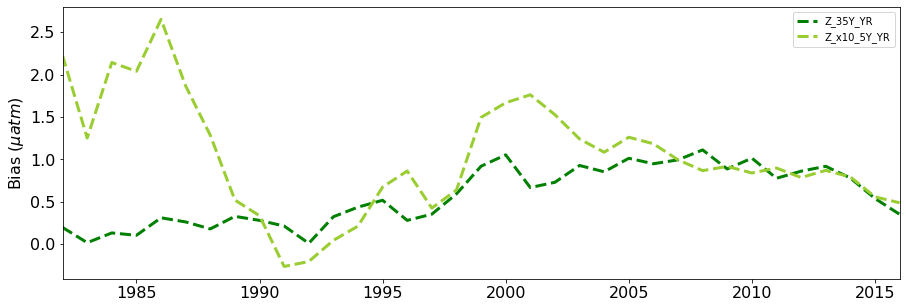

In [8]:
fig = plt.figure(figsize=(15,5))

plt.plot(timeline_zigzag_35_SO.year, timeline_zigzag_35_SO, label='Z_35Y_YR', linewidth=3.0, color='green', linestyle='--')
plt.plot(timeline_zigzag_5_SO.year, timeline_zigzag_5_SO, label='Z_x10_5Y_YR', linestyle='--', color='yellowgreen', linewidth=3.0)

#plt.title('Southern Ocean', fontsize=20)
plt.ylabel('Bias ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

plt.legend();

#fig.savefig("/home/theimdal/Bias_SO_timeseries.jpg",dpi=300, bbox_inches="tight")

In [30]:
# Calculate bias for timeseries for the different sampling experiments

timeline_SOCAT_SO = ds_SOCAT_only.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_5_SO = ds_Saildrone_5.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_5_winter_SO = ds_Saildrone_5_5x_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_10_SO = ds_Saildrone_10.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_10_shifted_SO = ds_Saildrone_10_shifted.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_x12_SO = ds_Saildrone_10_mult_12.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_x12_winter_SO = ds_Saildrone_10_mult_12_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_10_SO = ds_Saildrone_zigzag_10.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_10_winter_SO = ds_Saildrone_zigzag_10_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_5_SO = ds_Saildrone_zigzag_5_x12.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_5_winter_SO = ds_Saildrone_zigzag_5_x12_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])

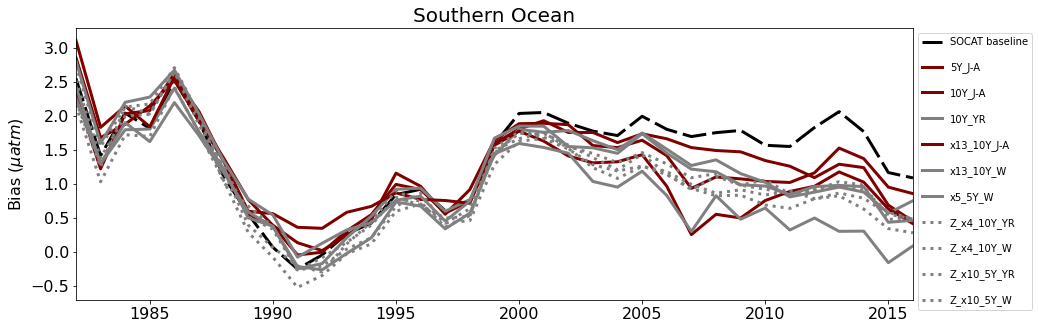

In [31]:
# This figure shows runs with sampling covering the full Southern Hemisphere winter months in gray
# and runs not covering these months in red. 

fig = plt.figure(figsize=(15,5))

plt.plot(timeline_SOCAT_SO.year, timeline_SOCAT_SO, label='SOCAT baseline', color='black',linestyle='--', dashes=[8, 2],linewidth=3.0)
plt.plot(timeline_5_SO.year, timeline_5_SO, label='5Y_J-A', linewidth=3.0, color='maroon')
plt.plot(timeline_10_SO.year, timeline_10_SO, label='10Y_J-A', linewidth=3.0, color='maroon')
plt.plot(timeline_10_shifted_SO.year, timeline_10_shifted_SO, label='10Y_YR', linewidth=3.0, color='gray')
plt.plot(timeline_x12_SO.year, timeline_x12_SO, label='x13_10Y_J-A', color='maroon', linewidth=3.0)
plt.plot(timeline_x12_winter_SO.year, timeline_x12_winter_SO, label='x13_10Y_W',color='gray', linewidth=3.0)
plt.plot(timeline_5_winter_SO.year, timeline_5_winter_SO, label='x5_5Y_W', color='gray', linewidth=3.0)

plt.plot(timeline_zigzag_10_SO.year, timeline_zigzag_10_SO, label='Z_x4_10Y_YR', linestyle=':', color='gray', linewidth=3.0)
plt.plot(timeline_zigzag_10_winter_SO.year, timeline_zigzag_10_winter_SO, label='Z_x4_10Y_W', linestyle=':', color='gray', linewidth=3.0)
plt.plot(timeline_zigzag_5_SO.year, timeline_zigzag_5_SO, label='Z_x10_5Y_YR', linestyle=':', color='gray', linewidth=3.0)
plt.plot(timeline_zigzag_5_winter_SO.year, timeline_zigzag_5_winter_SO, label='Z_x10_5Y_W', linestyle=':', color='gray', linewidth=3.0)


plt.title('Southern Ocean', fontsize=20)
plt.ylabel('Bias ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5);

#fig.savefig("/home/theimdal/Bias_SO_timeseries.jpg",dpi=300, bbox_inches="tight")

In [6]:
timeline_SOCAT_SO = ds_SOCAT_only.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_35_SO = ds_Saildrone_zigzag_35.diff('status').sel(ylat=slice(-90,-35),time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon', 'status'])

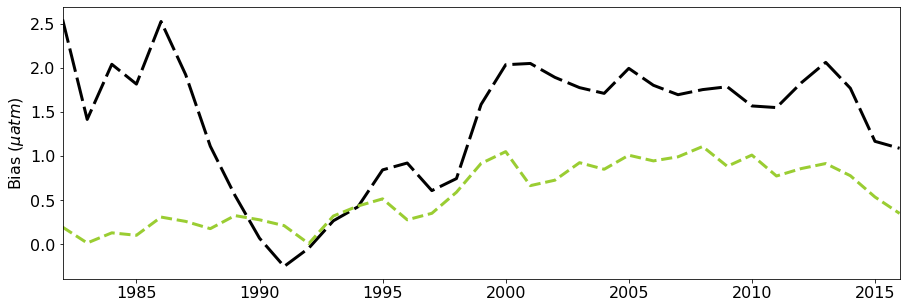

In [8]:
# Compare bias of SOCAT-baseline vs. 35 years of zigzag USV sampling
# When zigzag sampling occurs every year of the testbed period, bias decreases compared to using
# SOCAT samling only (pCO2 is LESS overestimated). 

fig = plt.figure(figsize=(15,5))

plt.plot(timeline_SOCAT_SO.year, timeline_SOCAT_SO, label='SOCAT baseline', color='black', linestyle='--', linewidth=3.0, dashes=[8, 2])

plt.plot(timeline_zigzag_35_SO.year, timeline_zigzag_35_SO, label='Z_35Y_YR', linewidth=3.0, color='yellowgreen', linestyle='--')



#plt.title('Southern Ocean', fontsize=20)
plt.ylabel('Bias ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5);

#fig.savefig("/home/theimdal/Bias_SO_timeseries.jpg",dpi=300, bbox_inches="tight")

### RMSE

### Southern Ocean

In [16]:
# Calculate RMSE for timeseries for all experiments 

RMSE_timeline_SOCAT_SO = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_5_SO = xr.ufuncs.sqrt(((ds_Saildrone_5.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_5_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_5_5x_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_10_SO = xr.ufuncs.sqrt(((ds_Saildrone_10.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_10_shifted_SO = xr.ufuncs.sqrt(((ds_Saildrone_10_shifted.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_x12_SO = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_x12_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_10_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_10_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_5_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_5_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

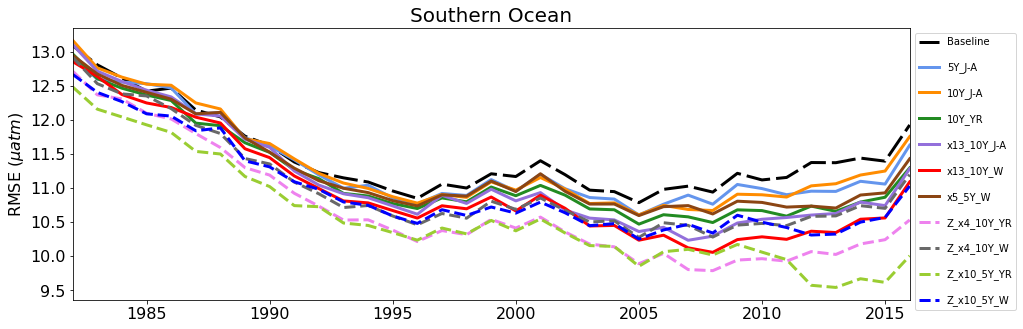

In [18]:
# Compare RMSE of the different sampling experiments
# All USV sampling experiments show lower RMSE compared to the SOCAT-baseline

fig = plt.figure(figsize=(15,5))

plt.plot(RMSE_timeline_SOCAT_SO.year, RMSE_timeline_SOCAT_SO, label='Baseline', color='black', linestyle='--', dashes=[8, 2],linewidth=3.0)
plt.plot(RMSE_timeline_5_SO.year, RMSE_timeline_5_SO, label='5Y_J-A',linewidth=3.0, color='cornflowerblue')
plt.plot(RMSE_timeline_10_SO.year, RMSE_timeline_10_SO, label='10Y_J-A',linewidth=3.0, color='darkorange')
plt.plot(RMSE_timeline_10_shifted_SO.year, RMSE_timeline_10_shifted_SO, label='10Y_YR',linewidth=3.0, color='forestgreen')
plt.plot(RMSE_timeline_x12_SO.year, RMSE_timeline_x12_SO, label='x13_10Y_J-A', color='mediumpurple',linewidth=3.0)
plt.plot(RMSE_timeline_x12_winter_SO.year, RMSE_timeline_x12_winter_SO, label= 'x13_10Y_W', color='red',linewidth=3.0)
plt.plot(RMSE_timeline_5_winter_SO.year, RMSE_timeline_5_winter_SO, label='x5_5Y_W', color='saddlebrown',linewidth=3.0)

plt.plot(RMSE_timeline_zigzag_10_SO.year, RMSE_timeline_zigzag_10_SO, label='Z_x4_10Y_YR', linestyle='--', color='violet',linewidth=3.0)
plt.plot(RMSE_timeline_zigzag_10_winter_SO.year, RMSE_timeline_zigzag_10_winter_SO, label='Z_x4_10Y_W', linestyle='--', color='dimgray',linewidth=3.0)
plt.plot(RMSE_timeline_zigzag_5_SO.year, RMSE_timeline_zigzag_5_SO, label='Z_x10_5Y_YR', linestyle='--', color='yellowgreen',linewidth=3.0)
plt.plot(RMSE_timeline_zigzag_5_winter_SO.year, RMSE_timeline_zigzag_5_winter_SO, label='Z_x10_5Y_W', linestyle='--', color='blue',linewidth=3.0)

plt.title('Southern Ocean', fontsize=20)
plt.ylabel('RMSE ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5);

#fig.savefig("/home/theimdal/RMSE_SO_timeseries.jpg",dpi=300, bbox_inches="tight")